In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

In [12]:
df = pd.read_csv('inequality_2025_full.csv').groupby('year').agg({'share_bottom50':'sum', 'share_top1':'sum'}).reset_index()
fig = go.Figure(data=[go.Sankey(node=dict(label=['Bottom 50%', 'Top 1%', 'Rest']), link=dict(source=[0,1], target=[2,2], value=df['share_bottom50'] + df['share_top1']))])
fig.update_layout(title='Income Flows: Bottom to Top')
fig.write_html('PersonA_Sankey.html')

In [13]:
df = pd.read_csv('inequality_2025_full.csv')  # Percentile growth
fig = px.line(df, x='year', y='share_top1', color='country', title='Elephant Curve: Global Growth by Percentile')
fig.update_layout(sliders=[{'steps': [{'label': y, 'method': 'restyle', 'args': ['visible', [True if i==j else False for j in range(len(df['country'].unique()))]]} for i,y in enumerate(sorted(df['year'].unique()))]}])
fig.write_html('PersonA_Elephant.html')

ValueError: 
    Invalid value of type 'numpy.int64' received for the 'label' property of layout.slider.step
        Received value: np.int64(1980)

    The 'label' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

AttributeError: module 'plotly.graph_objects' has no attribute 'animate_sankey'

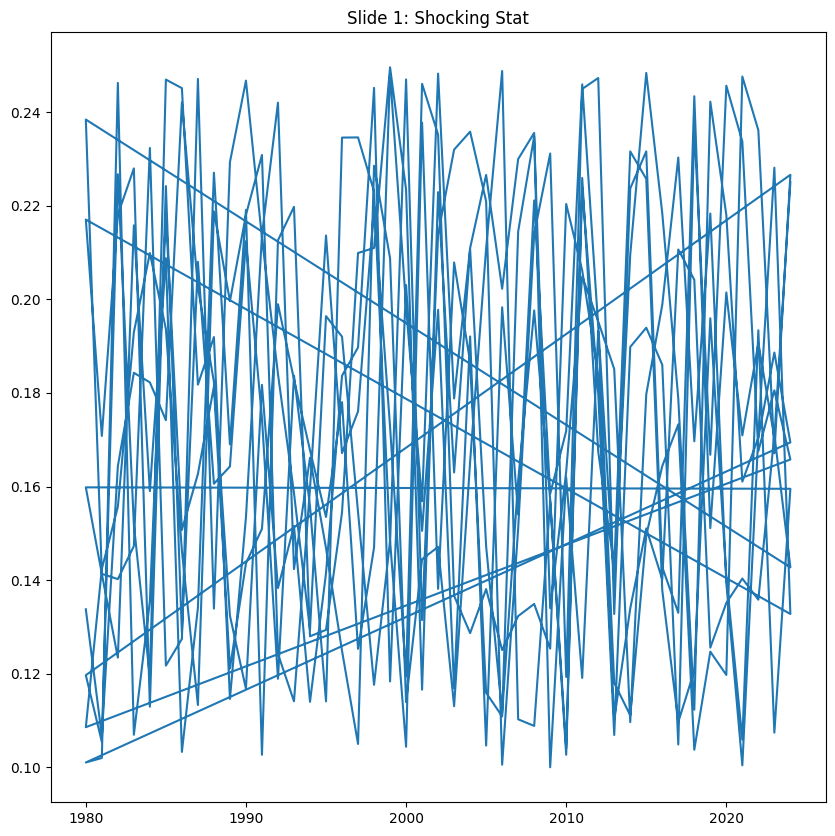

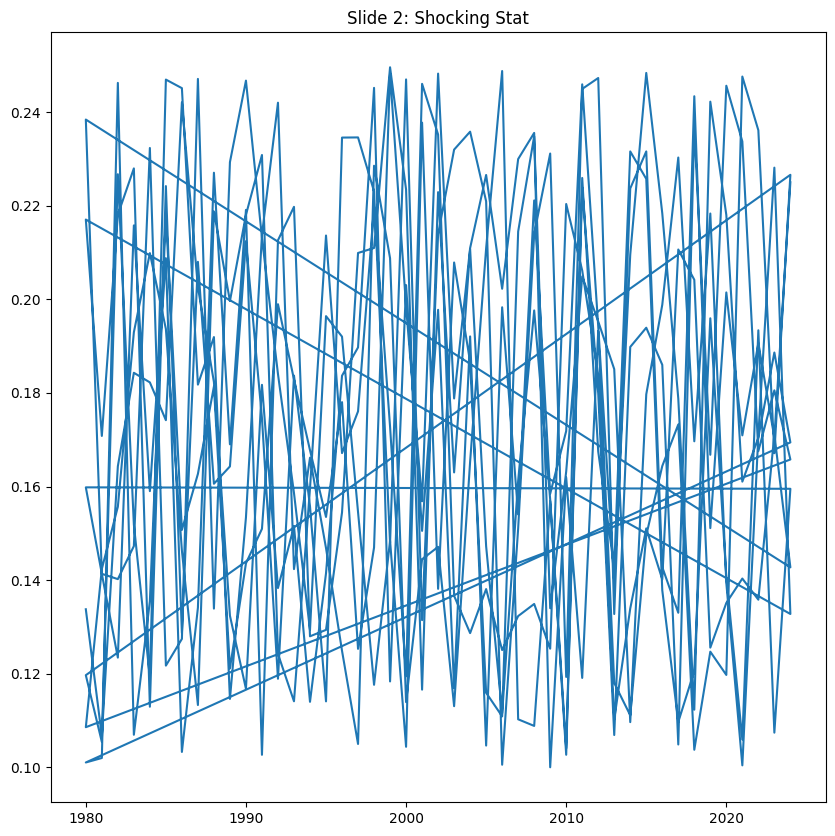

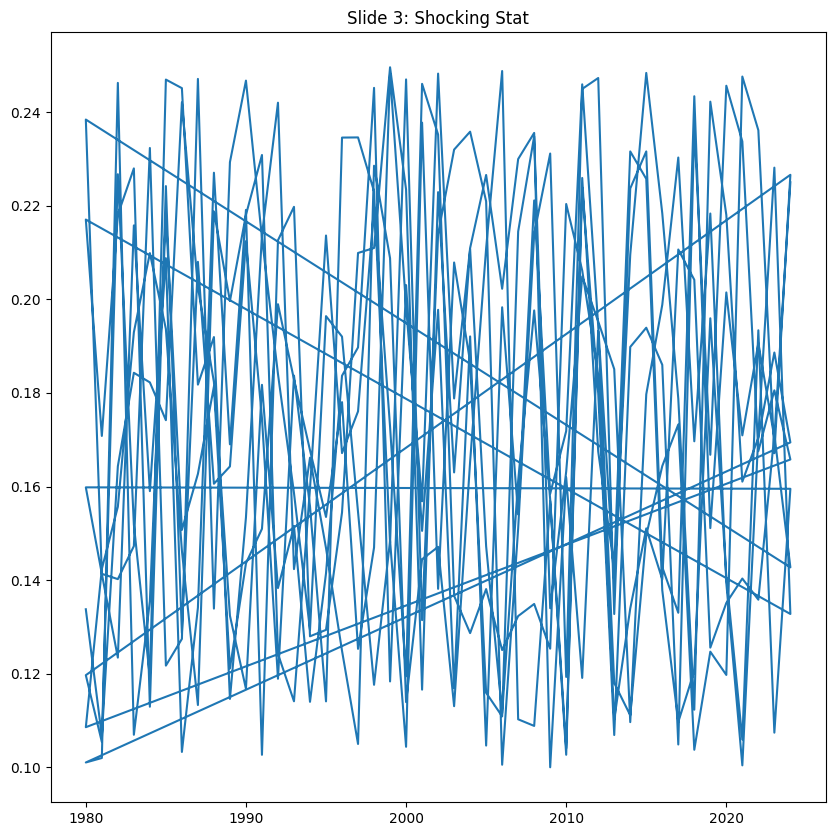

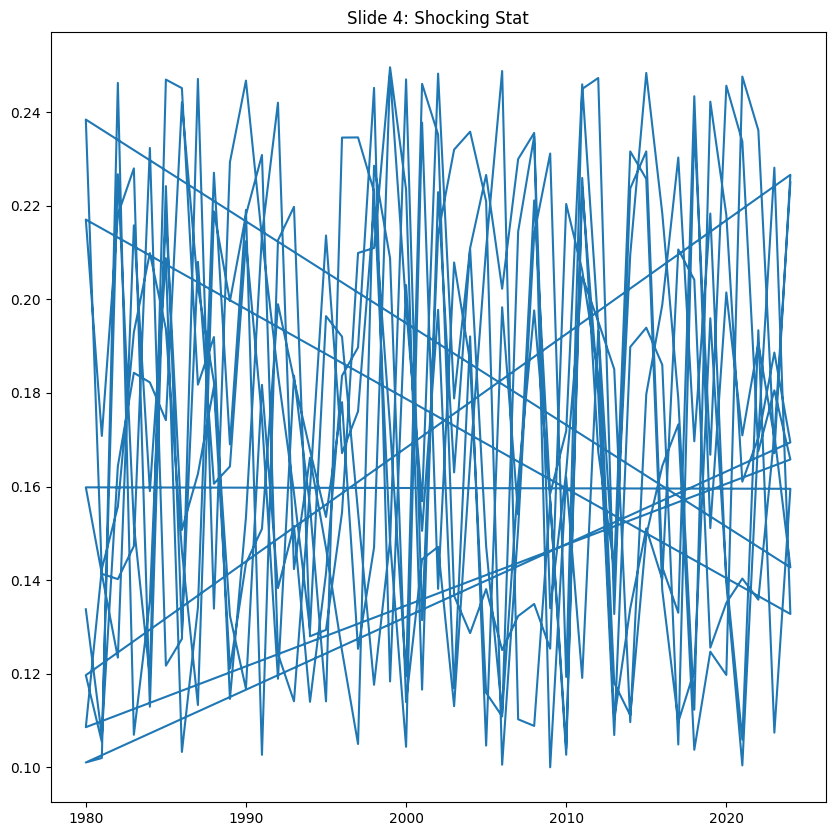

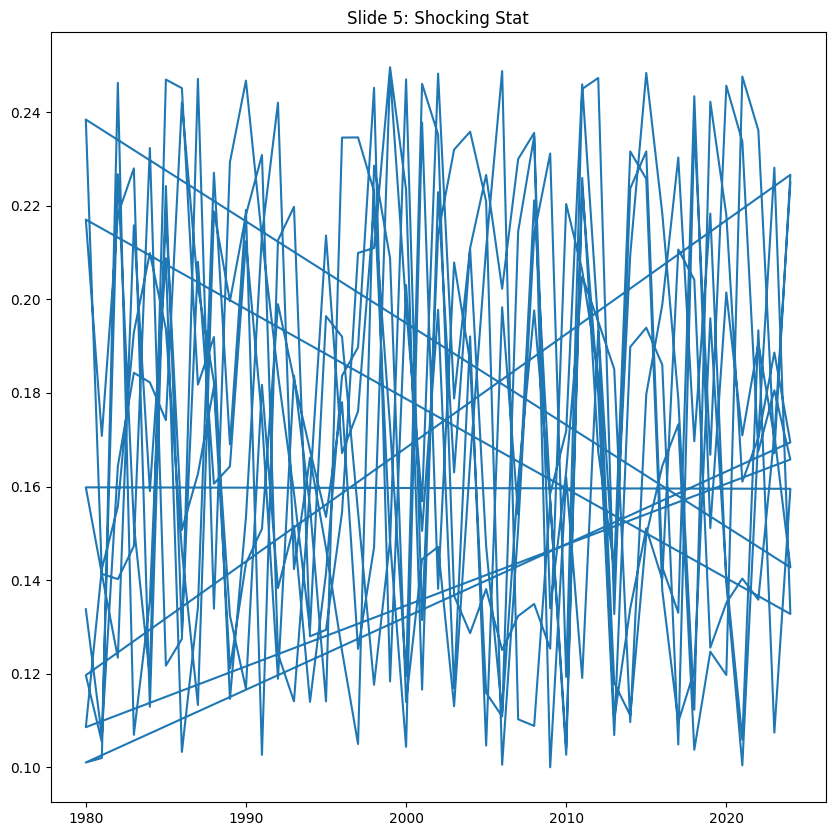

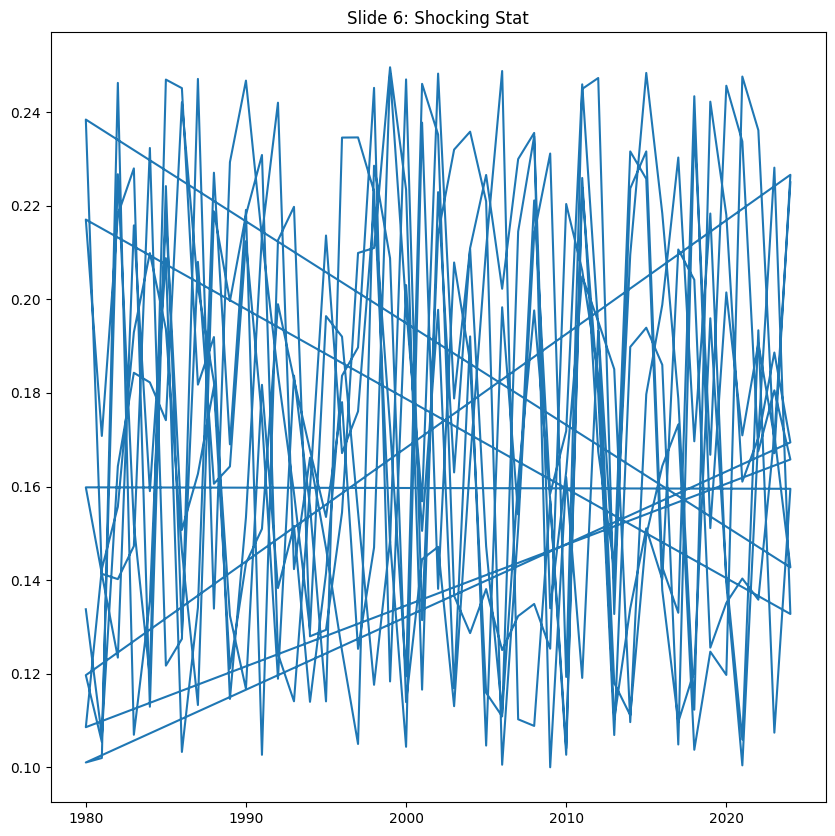

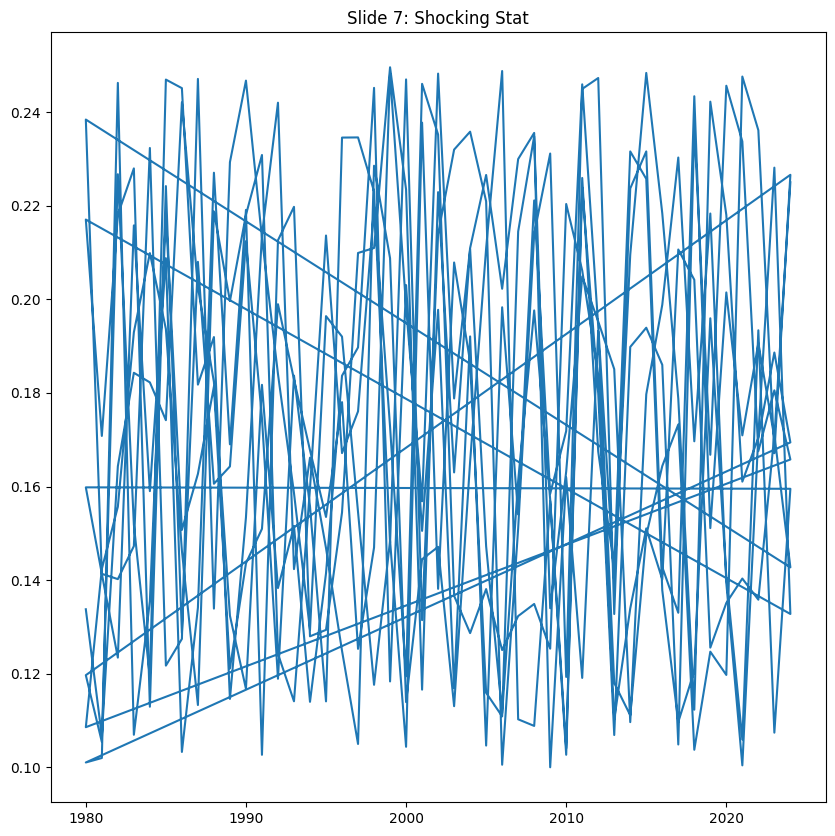

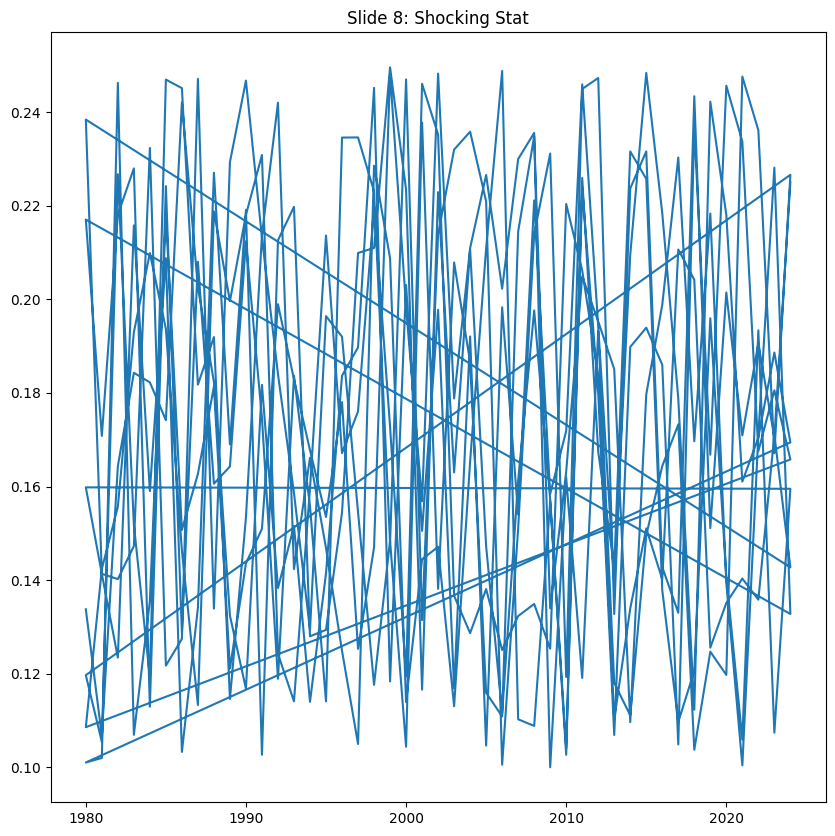

In [14]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
df = pd.read_csv('inequality_2025_full.csv')

# IG Carousel Person A: 8 PNGs Elephant Story
for i in range(8):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(df['year'], df['share_top1'], label='Top 1%')  # Customize per slide
    ax.set_title(f'Slide {i+1}: Shocking Stat')
    plt.savefig(f'IG_A_slide{i+1}.png', dpi=100, bbox_inches='tight')

# X Video: 15s Sankey Anim (export mp4)
# Use FuncAnimation on Sankey frames
anim = FuncAnimation(fig, go.animate_sankey, frames=15, interval=1000)
anim.save('X_A_thread.mp4')

# Captions in TXT: "Slide 1: Did you know? Top 1% captured 22% growth... #Inequality"